<a href="https://colab.research.google.com/github/balkisslama/assignments/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving stock.xlsx to stock.xlsx


***In This mini project, I will be using a Kaggle dataset that lists stock market values of a number of companies in order to provide the following: ***

-A clean, usable dataset.

-Top companies by market value.

-Overvalued vs undervalued stocks by PE ratio.

-Stocks near 52-week lows (potential investment opportunities).

-Visual analysis of market behavior.

In [5]:
import pandas as pd
import numpy as np



##Cleaning data ##

In [10]:
df = pd.read_excel("stock.xlsx")
df.head(3)

,Stock,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change
0,TCS,1234544.517475,3374.2,30.43,4045.5,0.165937,2926,0.153178,3334.6,0.011875
1,HUL,616301.326875,2620.6,63.81,2741.6,0.044135,1901.55,0.378139,2590.05,0.011795
2,Airtel,441027.397246,764.6,65.86,860.55,0.111498,628.75,0.216064,756.9,0.010173


In [8]:

import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Show initial info
print("Original Data Types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Original Data Types:
Stock                      object
Market Cap (In Rs Cr.)     object
Current price              object
PE Ratio                   object
52 Week High               object
% Below 52 week high       object
52 Week Low                object
% Above 52 Week low        object
Yesterday Closing Price    object
% Change                   object
dtype: object

Missing values:
Stock                      0
Market Cap (In Rs Cr.)     0
Current price              1
PE Ratio                   2
52 Week High               0
% Below 52 week high       1
52 Week Low                1
% Above 52 Week low        2
Yesterday Closing Price    0
% Change                   1
dtype: int64


In [37]:
#number of rows and columns
df.shape

(201, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 215
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Stock                    201 non-null    object 
 1   Market Cap (In Rs Cr.)   201 non-null    float64
 2   Current price            201 non-null    float64
 3   PE Ratio                 201 non-null    float64
 4   52 Week High             201 non-null    float64
 5   % Below 52 week high     201 non-null    float64
 6   52 Week Low              201 non-null    float64
 7   % Above 52 Week low      201 non-null    float64
 8   Yesterday Closing Price  201 non-null    float64
 9   % Change                 201 non-null    float64
 10  Near High                201 non-null    float64
 11  Near Low                 201 non-null    float64
dtypes: float64(11), object(1)
memory usage: 20.4+ KB


In [39]:
df.describe()

,Market Cap (In Rs Cr.),Current price,PE Ratio,52 Week High,% Below 52 week high,52 Week Low,% Above 52 Week low,Yesterday Closing Price,% Change,Near High,Near Low
count,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,6.887191e+04,2926.292040,52.091493,3644.551244,0.244705,2336.115075,0.251407,2925.782836,0.000258,0.755295,1.251407
std,1.688505e+05,8002.222695,80.608874,9045.229676,0.150555,6025.490957,0.228712,7997.004343,0.012826,0.150555,0.228712
min,8.806892e+02,20.150000,3.390000,24.750000,0.000804,12.110000,0.001049,19.900000,-0.053166,0.349456,1.001049
25%,7.451466e+03,498.250000,22.190000,671.000000,0.128106,428.900000,0.087105,494.900000,-0.006182,0.651693,1.087105
50%,2.145160e+04,1024.000000,36.520000,1366.550000,0.225326,784.800000,0.195257,1032.850000,0.000592,0.774674,1.195257
75%,4.947563e+04,2513.000000,59.820000,3582.900000,0.348307,2005.000000,0.335466,2495.500000,0.006953,0.871894,1.335466
max,1.620922e+06,89700.000000,918.200000,95954.350000,0.650544,62944.500000,1.134087,89498.350000,0.056706,0.999196,2.134087


In [17]:
# Clean numeric columns (remove commas, convert to float)
def clean_column(col):
    return pd.to_numeric(df[col].astype(str).str.replace(',', '').str.strip(), errors='coerce')


#RMINDER FOR MYSELF: basically a function that does this:



#.astype(str)
#Converts all values in the column to strings, even if they're numbers or NaNs. This is important for string operations coming next.

#.str.replace(',', '')
#"Removes commas from the string.
#E.g., '1,234.56' becomes '1234.56'.
#Useful for numbers written with commas as thousands separators.

#.str.strip()
##Removes any leading or trailing spaces from each string.
#E.g., ' 1234.56 ' becomes '1234.56'.

#pd.to_numeric(..., errors='coerce')
#Converts the cleaned string to a numeric type (int or float).
#If a value can’t be converted (e.g., 'N/A' or empty), it becomes NaN instead of raising an error.




In [18]:
cols_to_clean = [
    'Market Cap (In Rs Cr.)', 'Current price', 'PE Ratio', '52 Week High',
    '% Below 52 week high', '52 Week Low', '% Above 52 Week low',
    'Yesterday Closing Price', '% Change'
]

In [19]:
for col in cols_to_clean:
    df[col] = clean_column(col)

In [20]:
# Drop rows with too many missing values
df.dropna(inplace=True)

In [21]:
# Show basic statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Market Cap (In Rs Cr.)  Current price    PE Ratio  52 Week High  \
count            2.010000e+02     201.000000  201.000000    201.000000   
mean             6.887191e+04    2926.292040   52.091493   3644.551244   
std              1.688505e+05    8002.222695   80.608874   9045.229676   
min              8.806892e+02      20.150000    3.390000     24.750000   
25%              7.451466e+03     498.250000   22.190000    671.000000   
50%              2.145160e+04    1024.000000   36.520000   1366.550000   
75%              4.947563e+04    2513.000000   59.820000   3582.900000   
max              1.620922e+06   89700.000000  918.200000  95954.350000   

       % Below 52 week high   52 Week Low  % Above 52 Week low  \
count            201.000000    201.000000           201.000000   
mean               0.244705   2336.115075             0.251407   
std                0.150555   6025.490957             0.228712   
min                0.000804     12.110000       

/tmp/ipython-input-22-3258591624.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Market Cap (In Rs Cr.)', y='Stock', data=top_market_cap, palette='viridis')


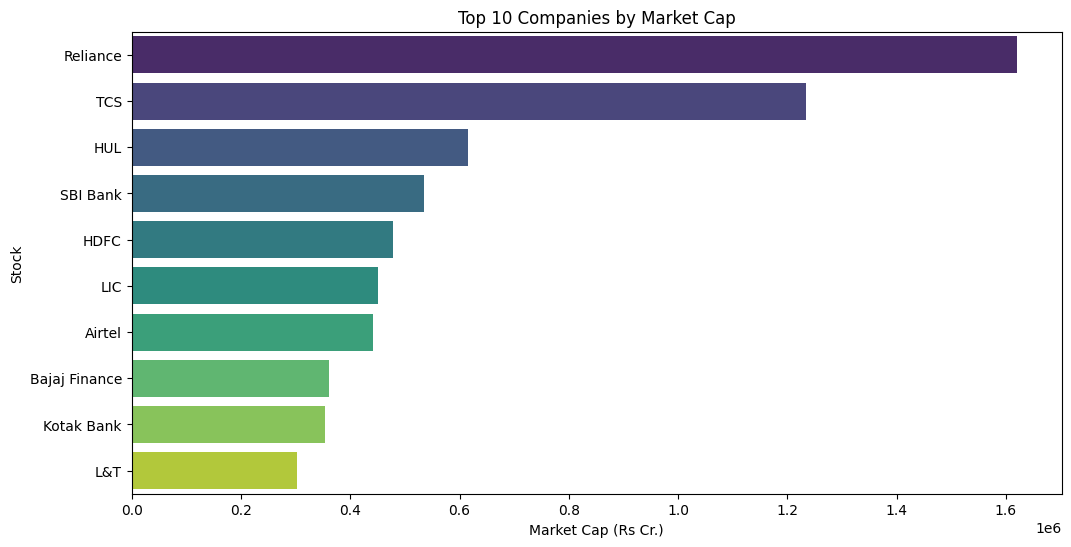

In [22]:
# 1. Top 10 companies by Market Cap
top_market_cap = df.sort_values(by='Market Cap (In Rs Cr.)', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='Market Cap (In Rs Cr.)', y='Stock', data=top_market_cap, palette='viridis')
plt.title('Top 10 Companies by Market Cap')
plt.xlabel('Market Cap (Rs Cr.)')
plt.ylabel('Stock')
plt.show()

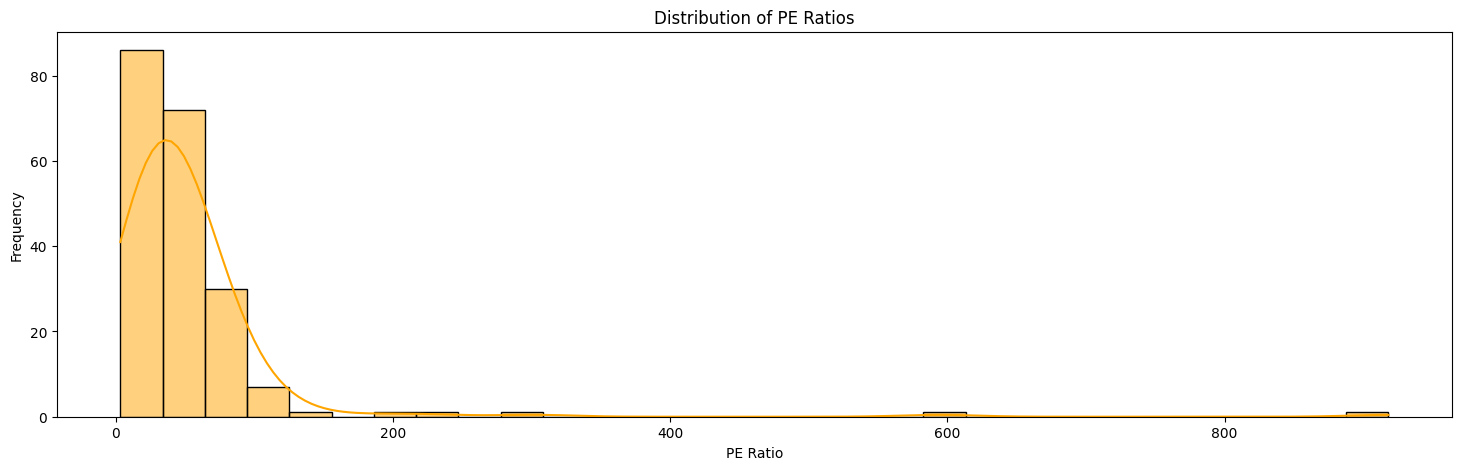

In [30]:
#2. PE Ratio Distribution
plt.figure(figsize=(18,5))
sns.histplot(df['PE Ratio'], bins=30, kde=True, color='orange')
plt.title('Distribution of PE Ratios')
plt.xlabel('PE Ratio')
plt.ylabel('Frequency')
plt.show()

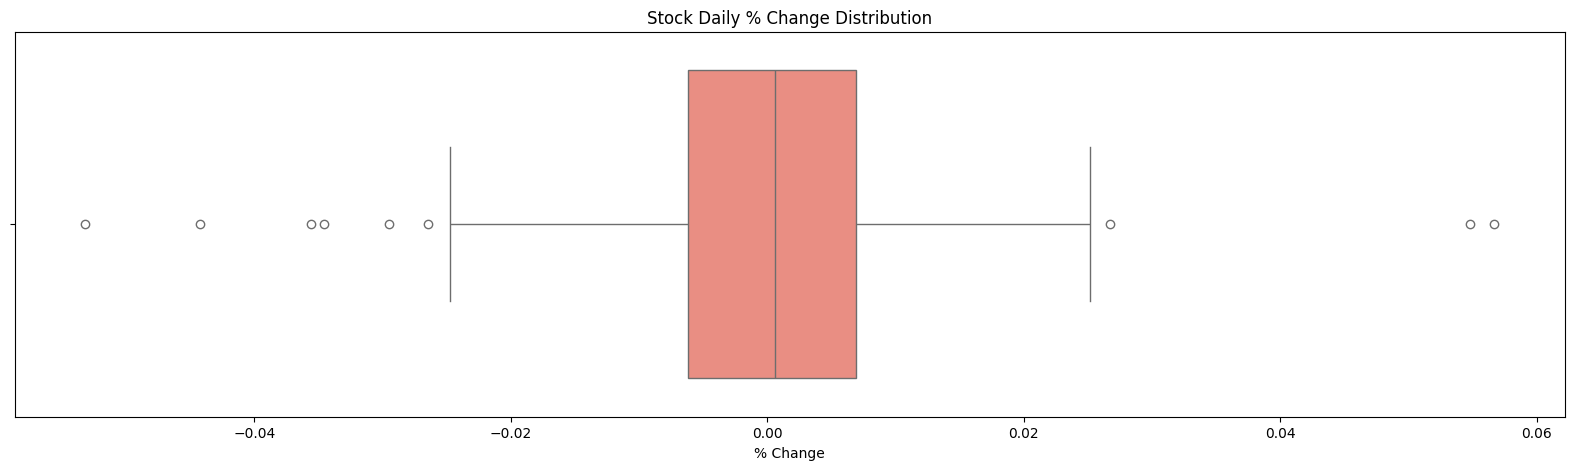

In [32]:
# 3. % Change (Price movement)
plt.figure(figsize=(20,5))
sns.boxplot(x=df['% Change'], color='salmon')
plt.title('Stock Daily % Change Distribution')
plt.xlabel('% Change')
plt.show()

In [34]:
# 4. Most undervalued vs overvalued (based on PE Ratio)
lowest_pe = df.nsmallest(5, 'PE Ratio')
highest_pe = df.nlargest(5, 'PE Ratio')
print("\nMost Undervalued Stocks (Lowest PE Ratios):")
print(lowest_pe[['Stock', 'PE Ratio']])
print("\nMost Overvalued Stocks (Highest PE Ratios):")
print(highest_pe[['Stock', 'PE Ratio']])


Most Undervalued Stocks (Lowest PE Ratios):
                    Stock  PE Ratio
99          Exide Battery      3.39
16             Tata Steel      5.13
86    LIC Housing Finance      6.85
120  Polyplex Corporation      7.36
156  Bhansali Engineering      8.27

Most Overvalued Stocks (Highest PE Ratios):
               Stock  PE Ratio
27             Nykaa    918.20
212            Subex    593.93
148  Sequent Science    302.86
45     Ashok Leyland    227.06
108         Mediplus    188.97


In [35]:
# 5. Price vs 52 Week Range (How close is the current price to extremes)
df['Near High'] = df['Current price'] / df['52 Week High']
df['Near Low'] = df['Current price'] / df['52 Week Low']

In [43]:
# Highlight stocks near their lows (potential buys?)
potential_buys = df[df['Near Low'] < 1.05].sort_values('Near Low').head(10)
print("\nStocks Trading Near 52 Week Lows (Potential Buys):")
print(potential_buys[['Stock', 'Current price', '52 Week Low', 'Near Low']])

# Save cleaned data
df.to_excel("cleaned.xlsx", index=False)



Stocks Trading Near 52 Week Lows (Potential Buys):
                Stock  Current price  52 Week Low  Near Low
209  Krisna dignostic         429.35       428.90  1.001049
187      Gland Pharma        1453.65      1450.00  1.002517
211  Aarti Industries         581.80       579.00  1.004836
214    Lux Industries        1524.70      1515.10  1.006336
151           Heranba         481.35       477.80  1.007430
64         Lauras Lab         357.40       354.00  1.009605
9       Bajaj Finserv        1391.00      1374.35  1.012115
107      Balaji Amine        2562.70      2530.00  1.012925
191          Atul Ltd        7701.20      7602.15  1.013029
118  Amber Enterprise        1870.00      1844.15  1.014017
